In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



# Chargement des données

In [62]:
data_march = pd.read_csv('listings.csv')
data_december = pd.read_csv('listings (1).csv')
data_september = pd.read_csv('listings (2).csv')
data= pd.concat([data_march,data_december,data_september])

In [63]:
# data.isnull().mean().sort_values(ascending=False).sum() * 100

In [64]:
# data['host_is_superhost'].isnull().count()

In [65]:
# data.columns


In [66]:
# data.columns.tolist()

In [67]:
# data.values.tolist()
# data.to_numpy()

In [68]:
# data.sort_values(ascending=False, by='beds')

# Supprimer les symboles de devise et convertir en flottant

In [69]:
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)


In [70]:
# data['host_is_superhost'].isna().sum()

In [71]:

# data['host_is_superhost'] = data['host_is_superhost'].replace({'t': 1, 'f': 0}).astype(int)


# Supprimer les espaces avant et après les noms de colonnes

In [72]:

data.columns.str.strip()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Sélection des colonnes pertinentes

In [73]:

# Index des colonnes
column_index = ['accommodates', 'bedrooms', 'bathrooms', 'property_type', 'room_type', 'amenities', 'price']


# Sélection des colonnes pertinentes dans les données
data = data[column_index]



# Gestion des valeurs manquantes

In [74]:

numerical_columns = ['accommodates', 'bedrooms', 'bathrooms']  # Colonnes numériques
# Création de l'imputeursimple
imputer = SimpleImputer(strategy='median')

# Ajuster l'imputeursimple aux données d'apprentissage
imputer.fit(data_march[numerical_columns])

# Appliquer l'imputeursimple aux données
data[numerical_columns] = imputer.transform(data[numerical_columns])



# Remplacer les valeurs manquantes dans les colonnes non numériques par 0

In [75]:
# data['host_is_superhost'] = data['host_is_superhost'].replace({'t': 1, 'f': 0}).astype(int)
data = data.fillna(0)
# data['host_location']= data['host_location'].fillna('Unknown')

# Séparation des données en ensembles d'entraînement et de test

In [76]:
# Remplacer les valeurs de 'amenities' par le nombre de commodités
data['amenities'] = data['amenities'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

In [77]:
# Traitement des données catégorielles (one-hot encoding)
data = pd.get_dummies(data, columns=['property_type', 'room_type'])

In [78]:

# Division des données en ensembles d'entraînement et de test
X = data.drop('price', axis=1)
y = data['price']



# Vérification des colonnes de X_train et X_test
if not X.columns.equals(X.columns):
    raise ValueError("Les colonnes de X_train et X_test ne sont pas identiques")

# Division des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

In [79]:
# data.describe()

In [80]:
# data.select_dtypes(exclude=['float64', 'int64']).columns


# Régression linéaire simple 

In [81]:
# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# Faire des prédictions sur les données de test
predictions = model.predict(X_test)

In [83]:

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, predictions)
print("MSE (Régression Linéaire):", mse)

# Régression linéaire simple pour la variable 'accommodates'
model_simple = LinearRegression()
model_simple.fit(X_train[['accommodates']], y_train)
predictions_simple = model_simple.predict(X_test[['accommodates']])
mse_simple = mean_squared_error(y_test, predictions_simple)
print("MSE (Régression Linéaire Simple):", mse_simple)


MSE (Régression Linéaire): 3.290345984958176e+20
MSE (Régression Linéaire Simple): 235602.17449197147


Entraînement et évaluation des modèles 

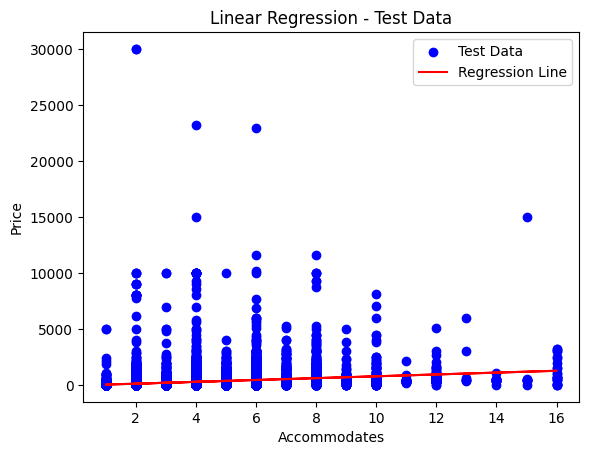

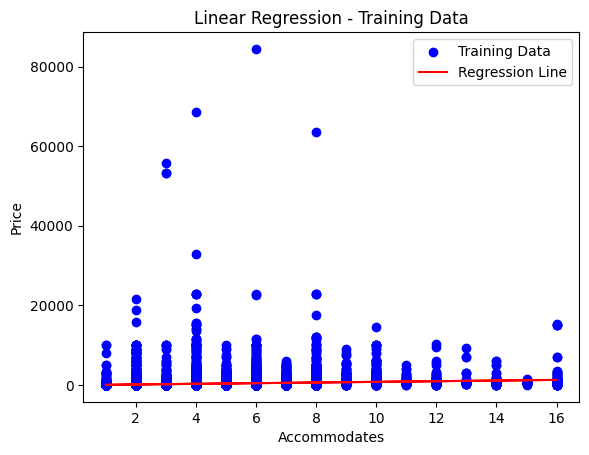

In [84]:
# Visualisation des résultats
plt.scatter(X_test['accommodates'], y_test, color='blue', label='Test Data')
plt.plot(X_test['accommodates'], predictions_simple, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Test Data')
plt.legend()
plt.show()

# Visualisation des données d'entraînement
plt.scatter(X_train['accommodates'], y_train, color='blue', label='Training Data')
plt.plot(X_train['accommodates'], model_simple.predict(X_train[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Training Data')
plt.legend()
plt.show()

# Entraînement et évaluation des modèles pour chaque période

In [87]:

# Combinaison des données des trois périodes
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

# Régression linéaire simple pour l'ensemble combiné
model_all_simple = LinearRegression()
model_all_simple.fit(X_train_all[['accommodates']], y_train_all)
predictions_all_simple = model_all_simple.predict(X_test_all[['accommodates']])
mse_all_simple = mean_squared_error(y_test_all, predictions_all_simple)
print("MSE pour les trois périodes combinées (Régression Linéaire Simple):", mse_all_simple)



MSE pour les trois périodes combinées (Régression Linéaire Simple): 235602.17449197147


# Concaténer les données de toutes les périodes

/Users/donyab/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


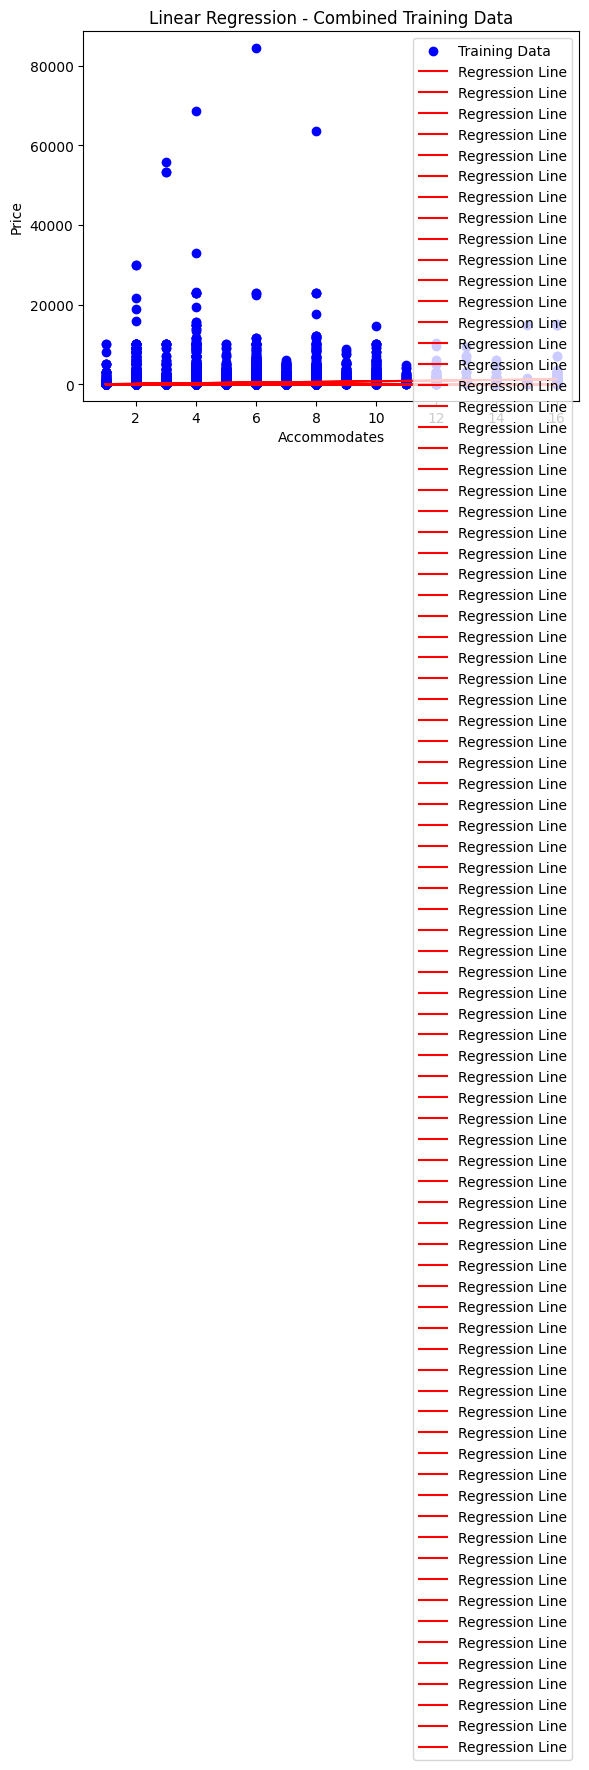

In [88]:
# Entraîner un modèle de régression linéaire sur les données combinées
model = LinearRegression()
model.fit(data[['accommodates']], data)

# Tracer la régression linéaire sur les données d'entraînement combinées
plt.scatter(data['accommodates'], data['price'], color='blue', label='Training Data')
plt.plot(data['accommodates'], model.predict(data[['accommodates']]), color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Training Data')
plt.legend()
plt.show()

# Calcul des pourcentages d'erreurs quadratiques moyennes pour chaque modèle

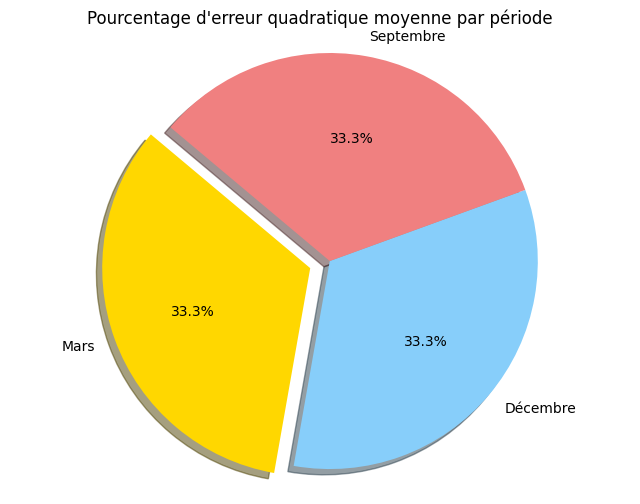

In [89]:
percentage = mse_simple * 100

labels = ['Mars', 'Décembre', 'Septembre']
sizes = [percentage] * len(labels)  # Répéter la valeur de percentage pour chaque période
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # Explosion du premier segment

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pourcentage d\'erreur quadratique moyenne par période')
plt.axis('equal')  # Assure un cercle parfait
plt.show()






# Faire des prédictions sur les données de test

In [90]:
predictions= model.predict(X_test)

# Calculer l'erreur quadratique moyenne pour mars
mse = mean_squared_error(y_test, predictions)




ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- amenities
- bathrooms
- bedrooms
- property_type_Barn
- property_type_Boat
- ...


# Prédictions combinées pour chaque mois

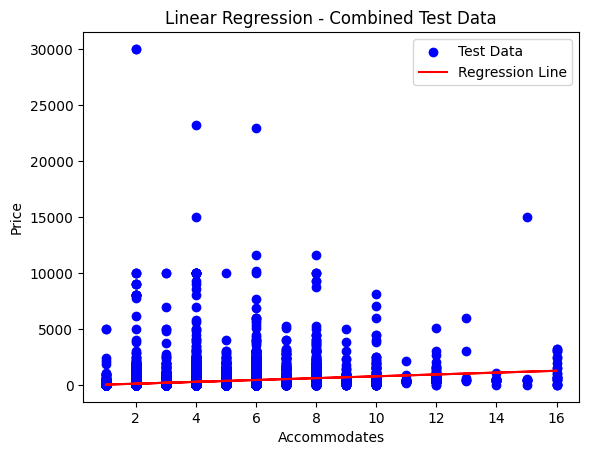

In [ ]:
plt.scatter(X_test_all['accommodates'], y_test_all, color='blue', label='Test Data')
plt.plot(X_test_all['accommodates'], predictions_all_simple, color='red', label='Regression Line')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression - Combined Test Data')
plt.legend()
plt.show()

# Plot des vraies valeurs par rapport aux prédictions

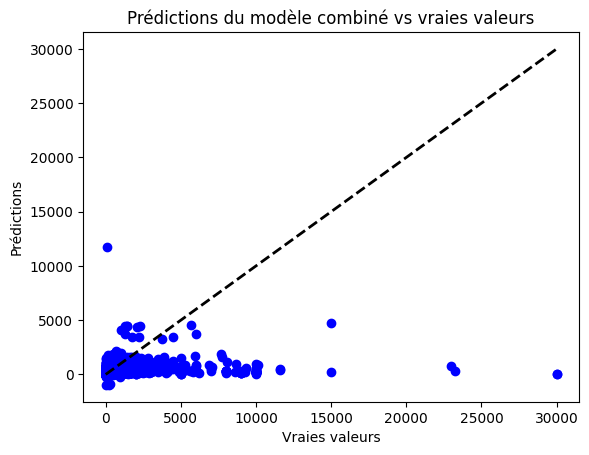

In [ ]:

plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Droite y = x
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions du modèle combiné vs vraies valeurs')
plt.show()

# Utilisation des modèles pour prédire les prix pour un nouveau logement

In [ ]:


## Prédiction pour un nouveau logement en Mars
new_listing = pd.DataFrame({'accommodates': [5], 'bedrooms': [2], 'bathrooms': [1.5]})

predicted_price = model.predict(new_listing)
print("Prix estimé pour un nouveau logement en Décembre :", predicted_price)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- bathrooms
- bedrooms


In [ ]:

# Calcul de la moyenne des prix prédits pour les trois périodes
predicted_price / 3

predicted_price


NameError: name 'predicted_price' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Création du DataFrame pour les prédictions
predictions = pd.DataFrame({
    'Période': ['Mars', 'Décembre', 'Septembre'],
    'Prix estimé': [predicted_price[0]]
})

# Tracé du graphique
plt.figure(figsize=(8, 6))
plt.bar(predictions['Période'], predictions['Prix estimé'], color=['blue', 'green', 'orange'])
plt.title('Estimation du prix pour un nouveau logement sur différentes périodes')
plt.xlabel('Période')
plt.ylabel('Prix estimé')
plt.show()


NameError: name 'predicted_price' is not defined